Understand NSE data. ***Upvote if you find it useful***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

banknifty.csv
nifty50.csv



In [2]:
banknifty = pd.read_csv("../input/banknifty.csv",parse_dates=['date','time'])
nifty50 = pd.read_csv("../input/nifty50.csv",parse_dates=['date','time'])
nifty50.head()

,index,date,time,open,high,low,close
0,NIFTY,2013-04-01,2017-05-15 09:16:00,5701.15,5704.65,5694.30,5697.00
1,NIFTY,2013-04-01,2017-05-15 09:17:00,5697.05,5698.35,5695.65,5697.50
2,NIFTY,2013-04-01,2017-05-15 09:18:00,5697.90,5697.90,5690.60,5692.15
3,NIFTY,2013-04-01,2017-05-15 09:19:00,5691.65,5694.70,5691.65,5693.90
4,NIFTY,2013-04-01,2017-05-15 09:20:00,5694.40,5695.05,5693.35,5694.55


In [3]:
banknifty.head()

,index,date,time,open,high,low,close
0,BANKNIFTY,2012-12-03,2017-05-15 09:16:00,12125.70,12161.70,12125.70,12160.95
1,BANKNIFTY,2012-12-03,2017-05-15 09:17:00,12161.75,12164.80,12130.40,12130.40
2,BANKNIFTY,2012-12-03,2017-05-15 09:18:00,12126.85,12156.10,12126.85,12156.10
3,BANKNIFTY,2012-12-03,2017-05-15 09:19:00,12157.25,12164.75,12151.60,12164.20
4,BANKNIFTY,2012-12-03,2017-05-15 09:20:00,12162.80,12162.80,12148.20,12151.15


In [4]:
banknifty = banknifty.drop(['index'],axis=1)
nifty50 = nifty50.drop(['index'],axis=1)

In [5]:
nifty50.describe()

,open,high,low,close
count,352920.000000,352920.000000,352920.000000,352920.000000
mean,7374.515649,7376.077510,7372.936147,7374.498883
std,1070.893139,1071.032665,1070.756739,1070.885970
min,5126.150000,5127.250000,5118.850000,5126.300000
25%,6167.650000,6168.900000,6166.550000,6167.700000
50%,7738.800000,7740.150000,7737.450000,7738.800000
75%,8298.762500,8300.900000,8297.050000,8298.750000
max,9115.400000,9119.200000,9105.650000,9106.500000


In [6]:
nifty50.loc[nifty50['high']==9119.2]

,date,time,open,high,low,close
240137,2015-03-04,2017-05-15 09:16:00,9115.4,9119.2,9105.65,9106.5


In [7]:
nifty50.loc[nifty50['high']==5127.25]

,date,time,open,high,low,close
13949,2013-08-28,2017-05-15 10:40:00,5127.25,5127.25,5122.7,5126.3


In [8]:
nifty50_mean = nifty50.groupby('date').mean()
nifty50_mean.head()

,open,high,low,close
date,,,,
2013-01-01,5950.678267,5951.491067,5949.986667,5950.689733
2013-01-02,5995.653733,5996.420267,5994.909200,5995.663733
2013-01-03,6003.101600,6003.903733,6002.381333,6003.124267
2013-01-04,5994.905733,5995.648667,5994.187467,5994.906800
2013-01-07,6011.653067,6012.265200,6010.813600,6011.506400


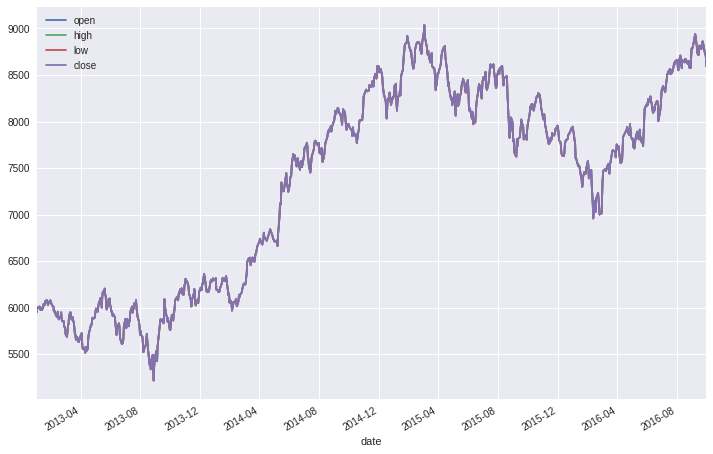

In [9]:
nifty50_mean.plot(figsize=(12,8))

In [10]:
banknifty.describe()

,open,high,low,close
count,367575.000000,367575.000000,367575.000000,367575.000000
mean,15078.023296,15082.498465,15073.480983,15077.993028
std,3184.438089,3185.213591,3183.628315,3184.411825
min,1405.050000,1407.050000,1404.600000,1405.200000
25%,12092.200000,12095.000000,12089.150000,12092.175000
50%,15526.100000,15531.200000,15521.400000,15525.950000
75%,17956.050000,17960.550000,17951.100000,17955.800000
max,20903.950000,20907.550000,20899.250000,20907.550000


In [11]:
banknifty.loc[banknifty['high']==20907.550]

,date,time,open,high,low,close
236193,2015-01-28,2017-05-15 12:35:00,20902.15,20907.55,20894.35,20907.55


In [12]:
banknifty.loc[banknifty['high']==1407.050]

,date,time,open,high,low,close
252479,2015-06-24,2017-05-15 15:19:00,1405.05,1407.05,1404.6,1406.25


In [13]:
banknifty_mean = banknifty.groupby('date').mean()
banknifty_mean.head()

,open,high,low,close
date,,,,
2012-11-01,11305.950533,11308.328400,11303.584000,11306.027600
2012-11-02,11429.929733,11432.193733,11427.817200,11429.955600
2012-11-05,11451.321867,11453.444667,11449.234667,11451.354533
2012-11-06,11494.561733,11496.849600,11492.694133,11494.892667
2012-11-07,11666.770800,11669.293467,11664.445067,11666.936533


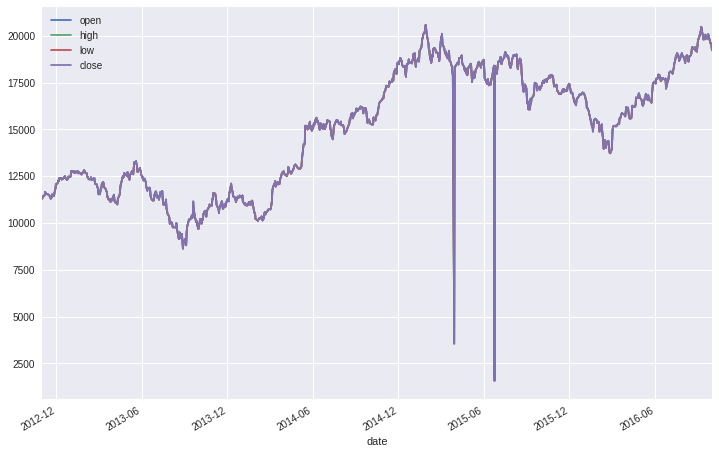

In [14]:
banknifty_mean.plot(figsize=(12,8))

There is 2 huge **drop** in year 2015. We will later on try to find the details of incident.

In [15]:
maximum_drop_nifty50 =  max(nifty50['open'] - nifty50['low'])
maximum_drop_nifty50

137.55000000000018

In [16]:
nifty50.loc[(nifty50['open'] - nifty50['low']) == maximum_drop_nifty50]

,date,time,open,high,low,close
162096,2014-05-30,2017-05-15 09:16:00,7256.0,7258.15,7118.45,7254.55


The day nifty50 **dipped** huge is 2014-05-30	

In [17]:
maximum_up_nifty50 =  max(nifty50['high'] - nifty50['open'])
nifty50.loc[(nifty50['high'] - nifty50['open']) == maximum_up_nifty50]

,date,time,open,high,low,close
158346,2014-05-16,2017-05-15 09:16:00,7273.55,7433.2,7264.4,7417.65


The day nifty50 **raised** huge is 2014-05-16

In [18]:
maximum_drop_banknifty =  max(banknifty['open'] - banknifty['low'])
maximum_drop_banknifty

282.39999999999964

In [19]:
banknifty.loc[(banknifty['open'] - banknifty['low']) == maximum_drop_banknifty]

,date,time,open,high,low,close
105107,2013-09-20,2017-05-15 11:02:00,11132.8,11132.8,10850.4,10850.4


The day banknifty **dipped** huge is 2013-09-20

In [20]:
maximum_up_banknifty =  max(banknifty['high'] - banknifty['open'])
banknifty.loc[(banknifty['high'] - banknifty['open']) == maximum_up_banknifty]

,date,time,open,high,low,close
318825,2016-01-20,2017-05-15 09:16:00,15049.35,15533.45,14978.1,14980.9


The day banknifty **raised** huge is 2016-01-20

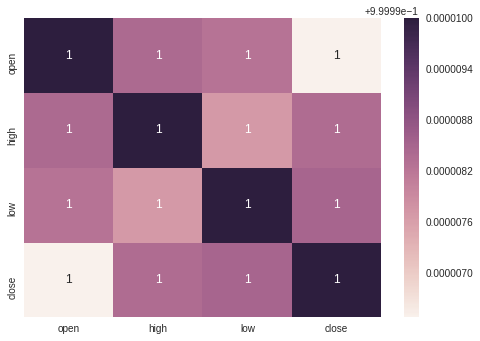

In [21]:
sns.heatmap(banknifty.corr(),annot=True)

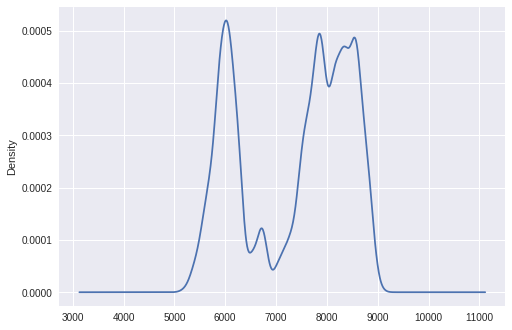

In [22]:
nifty50['high'].plot('kde')

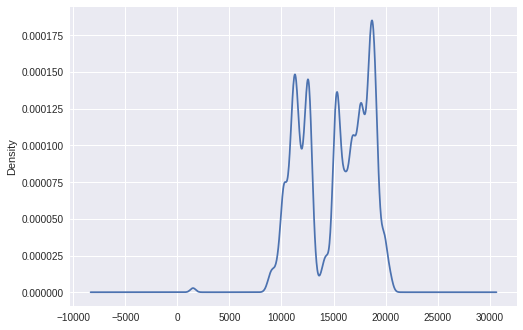

In [23]:
banknifty['high'].plot('kde')